In [63]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,QuantileTransformer
import matplotlib.pyplot as plt
import tensorflow as tf

fetch some S&P500 data from yahoo finance

In [65]:
spx = yf.download('^SPX')

[*********************100%***********************]  1 of 1 completed


In [66]:
spx

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX,^SPX
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-12-20,5930.850098,5930.850098,5982.060059,5832.299805,5842.000000,8223220000
2024-12-23,5974.069824,5974.069824,5978.250000,5902.569824,5940.250000,3593280000


<Axes: xlabel='Date'>

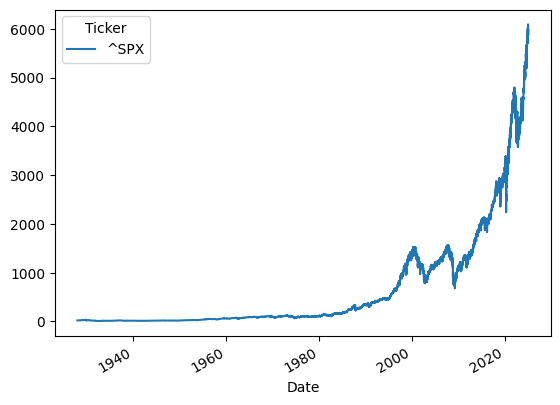

In [67]:
spx['Adj Close'].plot()

fetch VIX (volatility based on SPX options from CBOE)

In [68]:
vix = yf.download('^VIX')

[*********************100%***********************]  1 of 1 completed


In [69]:
vix

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0
...,...,...,...,...,...,...
2024-12-20,18.360001,18.360001,26.510000,17.820000,24.139999,0
2024-12-23,16.780001,16.780001,20.020000,16.740000,18.090000,0


In [70]:
spx = spx[spx.index >= '1990']
spx

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX,^SPX
Date,,,,,,
1990-01-02,359.690002,359.690002,359.690002,351.980011,353.399994,162070000
1990-01-03,358.760010,358.760010,360.589996,357.890015,359.690002,192330000
1990-01-04,355.670013,355.670013,358.760010,352.890015,358.760010,177000000
1990-01-05,352.200012,352.200012,355.670013,351.350006,355.670013,158530000
1990-01-08,353.790009,353.790009,354.239990,350.540009,352.200012,140110000
...,...,...,...,...,...,...
2024-12-20,5930.850098,5930.850098,5982.060059,5832.299805,5842.000000,8223220000
2024-12-23,5974.069824,5974.069824,5978.250000,5902.569824,5940.250000,3593280000


converge SPX into returns to get actual distribution instead of raw prices(maybe convert to scaled prices instead? but notice the price spread 1990 and 2024-*)

(8814, 1)

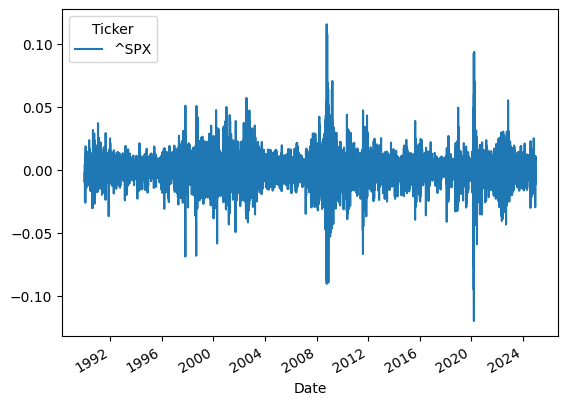

In [71]:
spx_returns = spx['Adj Close'].pct_change()
spx_returns.dropna(inplace=True)
spx_returns.plot()
spx_returns.shape

<Axes: xlabel='Date'>

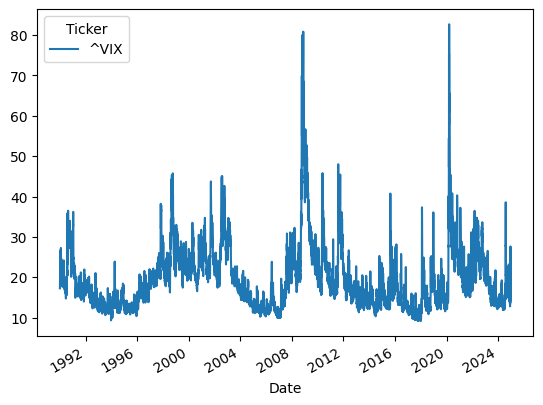

In [72]:
vix['Adj Close'].plot()

In [73]:
vix.tail(10)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^VIX,^VIX,^VIX,^VIX,^VIX,^VIX
Date,,,,,,
2024-12-13,13.810000,13.810000,14.250000,13.24,13.570000,0
2024-12-16,14.690000,14.690000,14.690000,13.99,14.370000,0
2024-12-17,15.870000,15.870000,15.940000,14.78,14.980000,0
2024-12-18,27.620001,27.620001,28.320000,14.82,15.570000,0
2024-12-19,24.090000,24.090000,24.120001,20.16,21.610001,0
2024-12-20,18.360001,18.360001,26.510000,17.82,24.139999,0
2024-12-23,16.780001,16.780001,20.020000,16.74,18.090000,0
2024-12-24,14.270000,14.270000,17.040001,14.27,16.969999,0


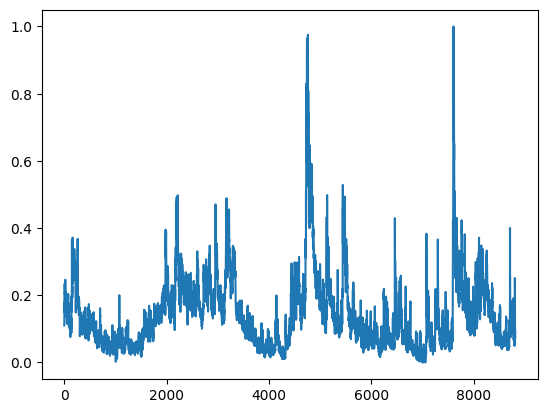

In [74]:
vix_scaled = MinMaxScaler().fit_transform(vix['Adj Close'])
plt.plot(vix_scaled)

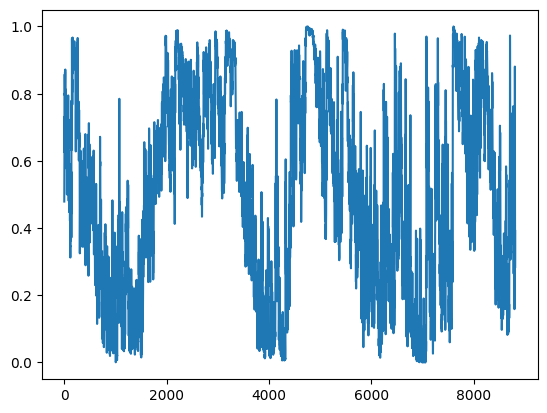

In [75]:
vix_scaled = QuantileTransformer().fit_transform(vix['Adj Close'])
plt.plot(vix_scaled)

we should also scale VIX to get plausible data for the model, also see the distribution is valid for neural network

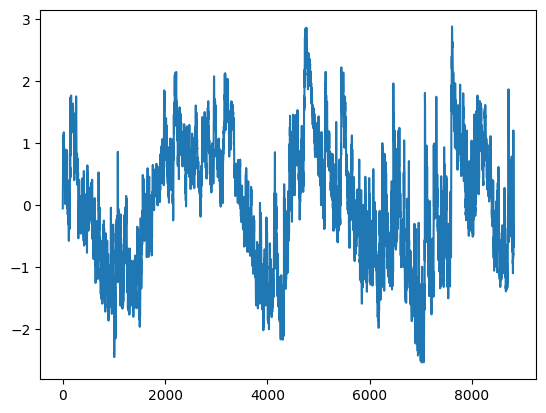

In [76]:
vix_scaled = PowerTransformer().fit_transform(vix['Adj Close'])
plt.plot(vix_scaled)

correlate and notice that VIX actually brings additional info to the model

In [77]:
np.correlate(vix_scaled[-5000:][0],np.array(spx_returns[-5000:])[0])

array([-0.00030372])

In [78]:
index = list(vix_scaled[:,0])

In [79]:
returns = list(spx_returns['^SPX'])

code for creating the sequences for model training and validation

In [244]:
def create_sequences(returns, index, sequence_length=5):
    X, y = [], []
    for i in range(len(returns) - sequence_length):
        X.append([returns[i:i + sequence_length],index[i:i + sequence_length]])
        y.append(returns[i + sequence_length])
    print(X)
    X = np.transpose(np.array(X),(0, 2, 1)) # interchange feature and sample dims
    y = np.array(y)
    return X, y

sequence_length = 5
X, y = create_sequences(returns[:5000], index[:5000], sequence_length)
X_val, y_val = create_sequences(returns[6000:7000], index[6000:7000], sequence_length)

[[[-0.00258553940745887, -0.00861298989234971, -0.009756237775744192, 0.00451446985457804, -0.011786690768585961], [-0.05531898046171999, 0.11035681613839607, 0.2741182966644535, 0.40401920013151155, 0.42494967195811256]], [[-0.00861298989234971, -0.009756237775744192, 0.00451446985457804, -0.011786690768585961, -0.006607166611908077], [0.11035681613839607, 0.2741182966644535, 0.40401920013151155, 0.42494967195811256, 0.6736359601906853]], [[-0.009756237775744192, 0.00451446985457804, -0.011786690768585961, -0.006607166611908077, 0.003512715525838761], [0.2741182966644535, 0.40401920013151155, 0.42494967195811256, 0.6736359601906853, 0.7018244163251216]], [[0.00451446985457804, -0.011786690768585961, -0.006607166611908077, 0.003512715525838761, -0.024675081438144675], [0.40401920013151155, 0.42494967195811256, 0.6736359601906853, 0.7018244163251216, 0.3955718853240467]], [[-0.011786690768585961, -0.006607166611908077, 0.003512715525838761, -0.024675081438144675, -0.008619400285092893],

model construction

In [152]:
model = tf.keras.Sequential()

In [153]:
model.add(tf.keras.layers.SimpleRNN(32,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

comple with mean squared error and mean absolute error

In [154]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

train and validate on some latter data

In [155]:
history = model.fit(X, y, epochs=5, batch_size=1, verbose=1,validation_data=(X_val, y_val))

Epoch 1/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - loss: 0.0336 - mae: 0.0708 - val_loss: 9.3946e-05 - val_mae: 0.0076
Epoch 2/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 2.2781e-04 - mae: 0.0107 - val_loss: 8.9933e-05 - val_mae: 0.0073
Epoch 3/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 2.0457e-04 - mae: 0.0103 - val_loss: 7.6143e-05 - val_mae: 0.0066
Epoch 4/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - loss: 1.8254e-04 - mae: 0.0096 - val_loss: 1.2435e-04 - val_mae: 0.0095
Epoch 5/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 1.5993e-04 - mae: 0.0091 - val_loss: 6.0395e-05 - val_mae: 0.0055


plot(more epochs needed??)

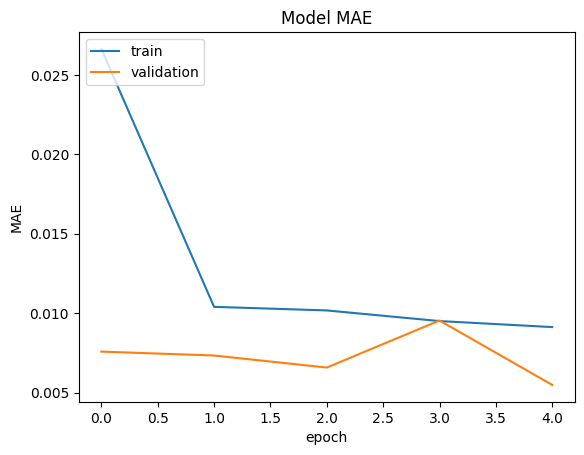

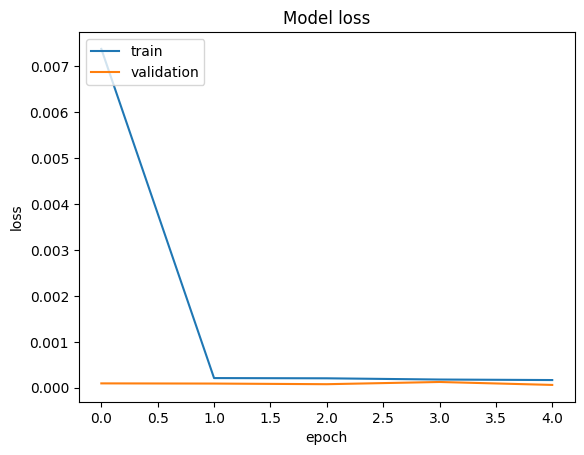

In [157]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

method to sequentially make returns predictions based on previous data and current index data(use other form of return prediction?)

In [229]:
def model_predictions(start_price,returns,index,sequence_length=5):
  ret = returns[1:sequence_length+1]
  for i in range(len(index) - sequence_length):
      print([ret[i:i+sequence_length],index[i:i+sequence_length]])
      input = tf.expand_dims(np.transpose(np.array([ret[i:i+sequence_length],index[i:i+sequence_length]])), axis=0)
      print(input,input.shape)
      r = model.predict(input)
      print(r)
      ret.append(r[0,0])
  prices = [start_price]
  for r in ret:
    price = prices[-1] + prices[-1] * r
    prices.append(price)
  return np.array(prices),np.array(ret)

In [230]:
last_price = spx['Adj Close'].iloc[-100].iloc[0]

In [231]:
pred,pred_returns = model_predictions(last_price,returns[-100:],index[-100:])

[[0.023042611519136447, 0.004671676849538509, 4.303397765514916e-05, 0.016847579753558328, 0.0038237284285767004], [1.2240235303633162, 0.851221700111966, 0.440131144603512, 0.48618137801594946, 0.09865408531055353]]
tf.Tensor(
[[[2.30426115e-02 1.22402353e+00]
  [4.67167685e-03 8.51221700e-01]
  [4.30339777e-05 4.40131145e-01]
  [1.68475798e-02 4.86181378e-01]
  [3.82372843e-03 9.86540853e-02]]], shape=(1, 5, 2), dtype=float64) (1, 5, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.00212556]]
[[0.004671676849538509, 4.303397765514916e-05, 0.016847579753558328, 0.0038237284285767004, 0.0021255552], [0.851221700111966, 0.440131144603512, 0.48618137801594946, 0.09865408531055353, -0.25743796721368484]]
tf.Tensor(
[[[ 4.67167685e-03  8.51221700e-01]
  [ 4.30339777e-05  4.40131145e-01]
  [ 1.68475798e-02  4.86181378e-01]
  [ 3.82372843e-03  9.86540853e-02]
  [ 2.12555518e-03 -2.57437967e-01]]], shape=(1, 5, 2), dtype=float64) (1, 5, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.00200025]]
[[4.

In [232]:
pred = pred[:-1]

In [233]:
spx[-100:]

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX,^SPX
Date,,,,,,
2024-08-07,5199.500000,5199.500000,5330.640137,5195.540039,5293.129883,4558260000
2024-08-08,5319.310059,5319.310059,5328.029785,5233.850098,5252.569824,4016830000
2024-08-09,5344.160156,5344.160156,5358.669922,5300.839844,5314.660156,3516400000
2024-08-12,5344.390137,5344.390137,5371.200195,5324.370117,5351.879883,3360160000
2024-08-13,5434.430176,5434.430176,5436.500000,5376.979980,5376.979980,3648980000
...,...,...,...,...,...,...
2024-12-20,5930.850098,5930.850098,5982.060059,5832.299805,5842.000000,8223220000
2024-12-23,5974.069824,5974.069824,5978.250000,5902.569824,5940.250000,3593280000


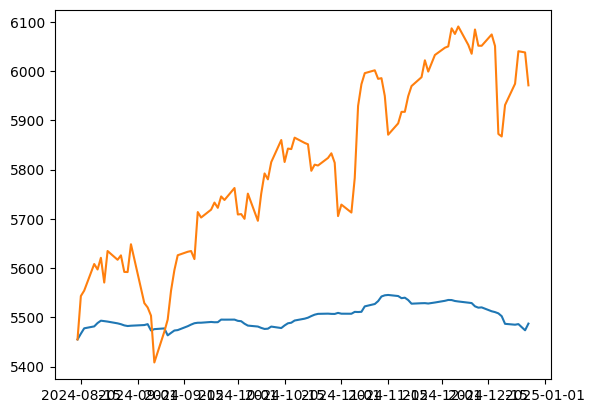

In [234]:
plt.plot(spx[-95:].index,pred[-95:]) # first 5 are the same
plt.plot(spx[-95:]['Adj Close'])

Epoch 1/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 0.0024 - mae: 0.0242 - val_loss: 8.8851e-05 - val_mae: 0.0068
Epoch 2/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 1.9068e-04 - mae: 0.0099 - val_loss: 9.2101e-05 - val_mae: 0.0076
Epoch 3/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - loss: 1.8637e-04 - mae: 0.0098 - val_loss: 6.4132e-05 - val_mae: 0.0059
Epoch 4/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 1.6159e-04 - mae: 0.0091 - val_loss: 5.9724e-05 - val_mae: 0.0054
Epoch 5/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 1.7544e-04 - mae: 0.0091 - val_loss: 6.0402e-05 - val_mae: 0.0055


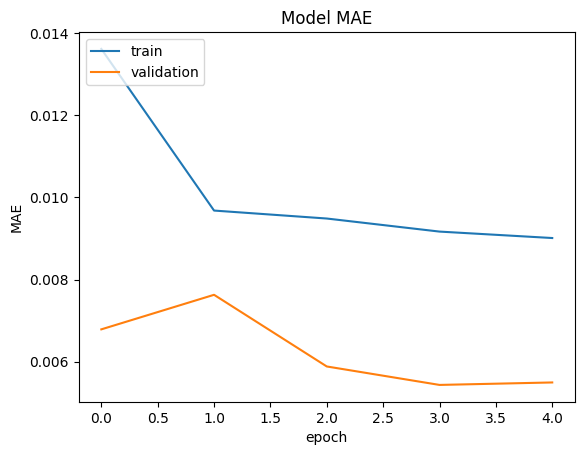

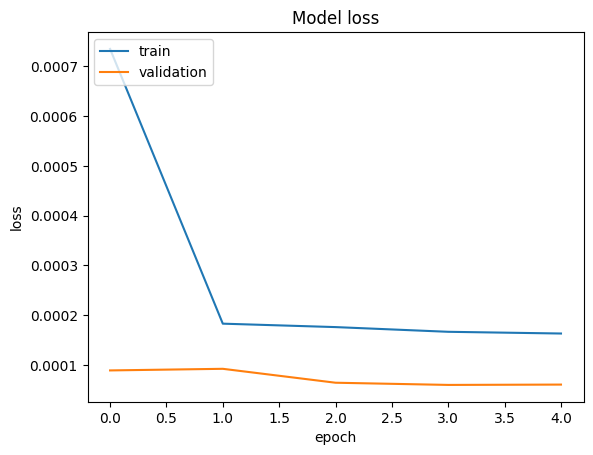

[[0.023042611519136447, 0.004671676849538509, 4.303397765514916e-05, 0.016847579753558328, 0.0038237284285767004], [1.2240235303633162, 0.851221700111966, 0.440131144603512, 0.48618137801594946, 0.09865408531055353]]
tf.Tensor(
[[[2.30426115e-02 1.22402353e+00]
  [4.67167685e-03 8.51221700e-01]
  [4.30339777e-05 4.40131145e-01]
  [1.68475798e-02 4.86181378e-01]
  [3.82372843e-03 9.86540853e-02]]], shape=(1, 5, 2), dtype=float64) (1, 5, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
[[0.00087868]]
[[0.004671676849538509, 4.303397765514916e-05, 0.016847579753558328, 0.0038237284285767004, 0.0008786754], [0.851221700111966, 0.440131144603512, 0.48618137801594946, 0.09865408531055353, -0.25743796721368484]]
tf.Tensor(
[[[ 4.67167685e-03  8.51221700e-01]
  [ 4.30339777e-05  4.40131145e-01]
  [ 1.68475798e-02  4.86181378e-01]
  [ 3.82372843e-03  9.86540853e-02]
  [ 8.78675375e-04 -2.57437967e-01]]], shape=(1, 5, 2), dtype=float64) (1, 5, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.00096718]]
[[4

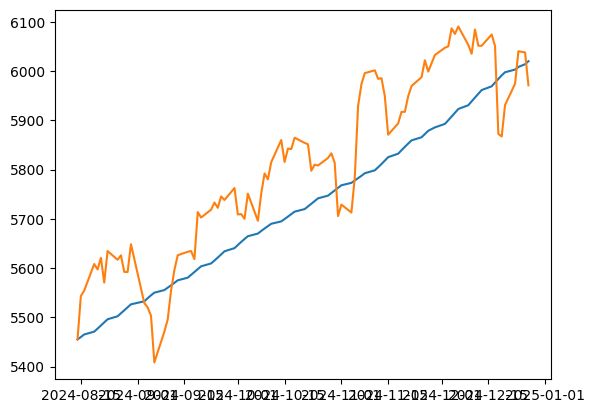

In [240]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X, y, epochs=5, batch_size=1, verbose=1,validation_data=(X_val, y_val))

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

pred,pred_returns = model_predictions(last_price,returns[-100:],index[-100:])
pred = pred[:-1]

plt.plot(spx[-95:].index,pred[-95:]) # first 5 are the same
plt.plot(spx[-95:]['Adj Close'])
plt.show()

LTSM performs much better on this dataset, but volatility measures seem to not be included into prediction(use unscaled VIX???)

In [249]:
vix_data = np.transpose(np.array(vix['Adj Close'][:5000]))[0]
vix_data

array([17.23999977, 18.19000053, 19.21999931, ..., 24.82999992,
       27.90999985, 24.76000023])

In [251]:
sequence_length = 5
X, y = create_sequences(returns[:5000], vix_data, sequence_length)
X_val, y_val = create_sequences(returns[6000:7000], index[6000:7000], sequence_length)

[[[-0.00258553940745887, -0.00861298989234971, -0.009756237775744192, 0.00451446985457804, -0.011786690768585961], array([17.23999977, 18.19000053, 19.21999931, 20.11000061, 20.26000023])], [[-0.00861298989234971, -0.009756237775744192, 0.00451446985457804, -0.011786690768585961, -0.006607166611908077], array([18.19000053, 19.21999931, 20.11000061, 20.26000023, 22.20000076])], [[-0.009756237775744192, 0.00451446985457804, -0.011786690768585961, -0.006607166611908077, 0.003512715525838761], array([19.21999931, 20.11000061, 20.26000023, 22.20000076, 22.44000053])], [[0.00451446985457804, -0.011786690768585961, -0.006607166611908077, 0.003512715525838761, -0.024675081438144675], array([20.11000061, 20.26000023, 22.20000076, 22.44000053, 20.04999924])], [[-0.011786690768585961, -0.006607166611908077, 0.003512715525838761, -0.024675081438144675, -0.008619400285092893], array([20.26000023, 22.20000076, 22.44000053, 20.04999924, 24.63999939])], [[-0.006607166611908077, 0.003512715525838761, -

Epoch 1/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 0.1458 - mae: 0.1850 - val_loss: 9.0297e-05 - val_mae: 0.0077
Epoch 2/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.9517e-04 - mae: 0.0102 - val_loss: 6.7501e-05 - val_mae: 0.0059
Epoch 3/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 2.2888e-04 - mae: 0.0111 - val_loss: 5.9609e-05 - val_mae: 0.0054
Epoch 4/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - loss: 1.7105e-04 - mae: 0.0095 - val_loss: 6.4242e-05 - val_mae: 0.0057
Epoch 5/5
4995/4995 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - loss: 1.5860e-04 - mae: 0.0089 - val_loss: 5.9273e-05 - val_mae: 0.0054


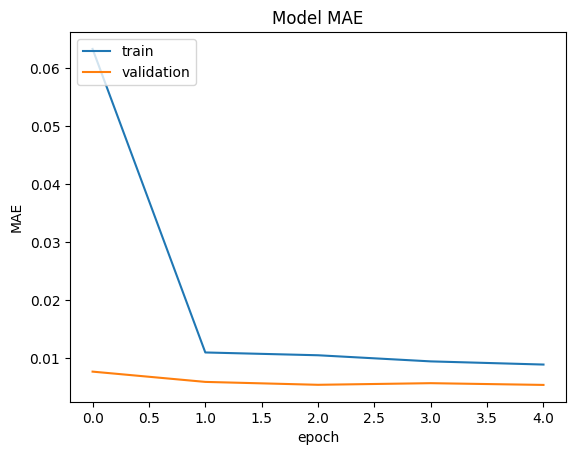

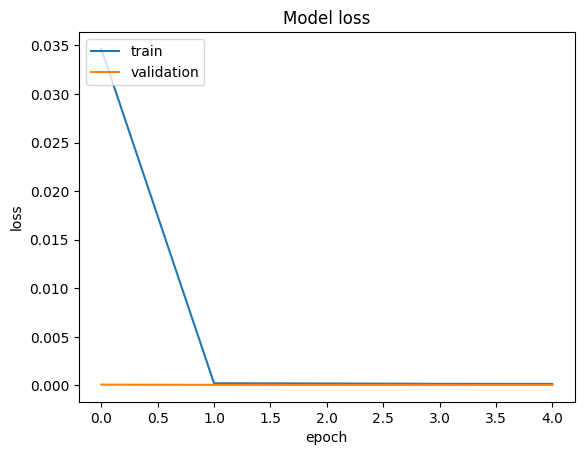

[[0.023042611519136447, 0.004671676849538509, 4.303397765514916e-05, 0.016847579753558328, 0.0038237284285767004], [1.2240235303633162, 0.851221700111966, 0.440131144603512, 0.48618137801594946, 0.09865408531055353]]
tf.Tensor(
[[[2.30426115e-02 1.22402353e+00]
  [4.67167685e-03 8.51221700e-01]
  [4.30339777e-05 4.40131145e-01]
  [1.68475798e-02 4.86181378e-01]
  [3.82372843e-03 9.86540853e-02]]], shape=(1, 5, 2), dtype=float64) (1, 5, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
[[0.00044682]]
[[0.004671676849538509, 4.303397765514916e-05, 0.016847579753558328, 0.0038237284285767004, 0.00044681603], [0.851221700111966, 0.440131144603512, 0.48618137801594946, 0.09865408531055353, -0.25743796721368484]]
tf.Tensor(
[[[ 4.67167685e-03  8.51221700e-01]
  [ 4.30339777e-05  4.40131145e-01]
  [ 1.68475798e-02  4.86181378e-01]
  [ 3.82372843e-03  9.86540853e-02]
  [ 4.46816033e-04 -2.57437967e-01]]], shape=(1, 5, 2), dtype=float64) (1, 5, 2)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.00037207]]
[[

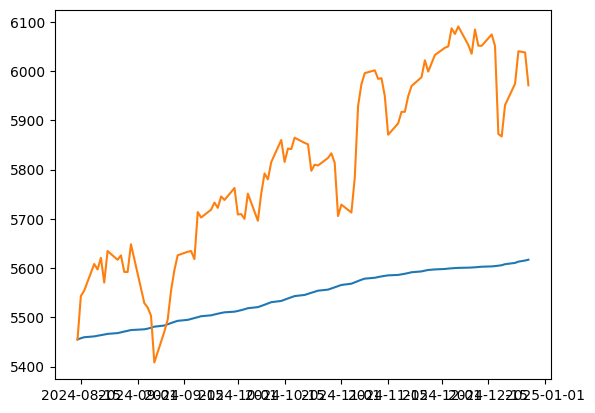

In [252]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X, y, epochs=5, batch_size=1, verbose=1,validation_data=(X_val, y_val))

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

pred,pred_returns = model_predictions(last_price,returns[-100:],index[-100:])
pred = pred[:-1]

plt.plot(spx[-95:].index,pred[-95:]) # first 5 are the same
plt.plot(spx[-95:]['Adj Close'])
plt.show()

NO! Scaled version works much better

The only thing left to discuss is the knowledge about VIX data, which actually could be speculated with other models(not this project)